In [2]:
import pandas as pd
import numpy as np

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [5]:
df = pd.read_csv("../MTA-metro/dataset/MTA_Subway_Hourly_Ridership__Beginning_February_2022.csv")

/Users/umut/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
def check_df(dataframe, head=10):
    print("###Shape###")
    print(dataframe.shape)
    print("###Info###")
    print(dataframe.info())
    print("###NonUnique###")
    print(dataframe.nunique())
    print("###Head###")
    print(dataframe.head(head))
    print("###Tail###")
    print(dataframe.tail(head))
    print("###NA###")
    print(dataframe.isnull().sum())
    print("###Quantiles###")
    print(dataframe.describe([0,0.05,0.50,0.95,0.99,1]).T)

check_df(df)

###Shape###
(11665628, 12)
###Info###
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11665628 entries, 0 to 11665627
Data columns (total 12 columns):
 #   Column              Dtype  
---  ------              -----  
 0   transit_timestamp   object 
 1   station_complex_id  object 
 2   station_complex     object 
 3   borough             object 
 4   routes              object 
 5   payment_method      object 
 6   ridership           int64  
 7   transfers           int64  
 8   latitude            float64
 9   longitude           float64
 10  Georeference        object 
 11  itsuid              object 
dtypes: float64(2), int64(2), object(8)
memory usage: 1.0+ GB
None
###NonUnique###
transit_timestamp        14446
station_complex_id         425
station_complex            425
borough                      5
routes                      96
payment_method               2
ridership                 8039
transfers                 1406
latitude                   424
longitude              

In [7]:
df["borough"].value_counts()

BK    4277060
M     3361796
Q     2114278
BX    1862549
SI      49945
Name: borough, dtype: int64

In [8]:
df["payment_method"].value_counts()


metrocard    5976014
omny         5689614
Name: payment_method, dtype: int64

In [9]:
df.drop(columns=["payment_method","transfers","Georeference","itsuid"],inplace=True)

In [10]:
df.head(10)

,transit_timestamp,station_complex_id,station_complex,borough,routes,ridership,latitude,longitude
0,03/27/2022 06:00:00 AM,H007,1 Av (L),M,L,12,40.73,-73.98
1,06/05/2022 02:00:00 AM,H007,1 Av (L),M,L,93,40.73,-73.98
2,06/13/2023 03:00:00 AM,H007,1 Av (L),M,L,3,40.73,-73.98
3,07/28/2023 05:00:00 AM,H007,1 Av (L),M,L,31,40.73,-73.98
4,08/08/2023 03:00:00 AM,H007,1 Av (L),M,L,3,40.73,-73.98
5,08/26/2023 05:00:00 AM,H007,1 Av (L),M,L,23,40.73,-73.98
6,02/10/2022 11:00:00 AM,R170,103 St (1),M,1,82,40.80,-73.97
7,02/27/2022 05:00:00 AM,R170,103 St (1),M,1,2,40.80,-73.97
8,03/18/2022 05:00:00 AM,R170,103 St (1),M,1,5,40.80,-73.97
9,03/18/2022 11:00:00 PM,R170,103 St (1),M,1,36,40.80,-73.97


In [11]:
m_stations = pd.DataFrame()
m_stations = df[df["borough"] == "M"].groupby(["station_complex","station_complex_id","latitude","longitude"]).agg({"ridership":"mean"}).sort_values("ridership",ascending=False).head(10)
m_stations.reset_index(inplace=True)
m_stations

,station_complex,station_complex_id,latitude,longitude,ridership
0,"Times Sq-42 St (N,Q,R,W,S,1,2,3,7)/42 St (A,C,...",N060,40.76,-73.98,2809.26
1,"Grand Central-42 St (S,4,5,6,7)",R238,40.75,-73.98,1527.51
2,"34 St-Herald Sq (B,D,F,M,N,Q,R,W)",A022,40.75,-73.99,1273.21
3,"14 St-Union Sq (L,N,Q,R,W,4,5,6)",A034,40.74,-73.99,1122.24
4,"Fulton St (A,C,J,Z,2,3,4,5)",N095,40.71,-74.01,939.74
5,"34 St-Penn Station (A,C,E)",N070,40.75,-73.99,901.48
6,"59 St-Columbus Circle (A,B,C,D,1)",N049,40.77,-73.98,843.77
7,"34 St-Penn Station (1,2,3)",R135,40.75,-73.99,827.55
8,"Chambers St (A,C)/WTC (E)/Park Pl (2,3)/Cortla...",N094,40.71,-74.01,647.48
9,"Lexington Av (N,R,W)/59 St (4,5,6)",A002,40.76,-73.97,609.62


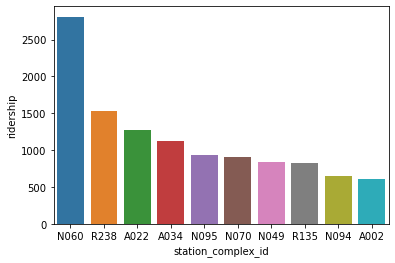

In [12]:
sns.barplot(x = "station_complex_id", y = "ridership", data = m_stations)
plt.show()

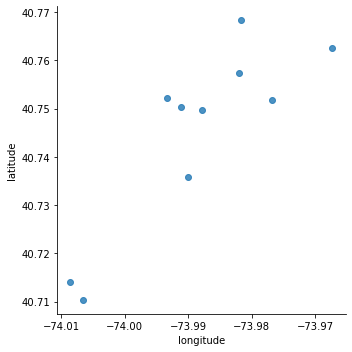

In [13]:
sns.lmplot(x = 'longitude', y = 'latitude', fit_reg = False, data = m_stations)
plt.show()

In [14]:
bk_stations = pd.DataFrame()
bk_stations = df[df["borough"] == "BK"].groupby(["station_complex","station_complex_id","latitude","longitude"]).agg({"ridership":"mean"}).sort_values("ridership",ascending=False).head(10)
bk_stations.reset_index(inplace=True)
bk_stations

,station_complex,station_complex_id,latitude,longitude,ridership
0,"Atlantic Av-Barclays Ctr (B,D,N,Q,R,2,3,4,5)",R610,40.68,-73.98,526.14
1,Bedford Av (L),H009,40.72,-73.96,454.86
2,"Jay St-MetroTech (A,C,F,R)",N103,40.69,-73.99,403.05
3,"Court St (R)/Borough Hall (2,3,4,5)",R602,40.69,-73.99,337.59
4,"Crown Heights-Utica Av (3,4)",R626,40.67,-73.93,282.95
5,"Myrtle-Wyckoff Avs (L,M)",H026,40.70,-73.91,269.92
6,"Kings Hwy (B,Q)",B024,40.61,-73.96,239.57
7,"DeKalb Av (B,Q,R)",C008,40.69,-73.98,239.44
8,Lorimer St (L)/Metropolitan Av (G),H012,40.71,-73.95,211.41
9,"Flatbush Av-Brooklyn College (2,5)",R645,40.63,-73.95,208.77


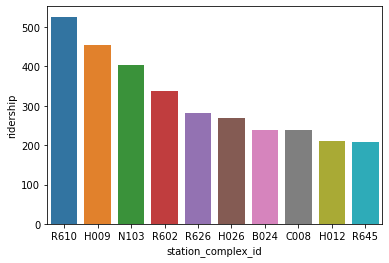

In [15]:
sns.barplot(x = "station_complex_id", y = "ridership", data = bk_stations)
plt.show()

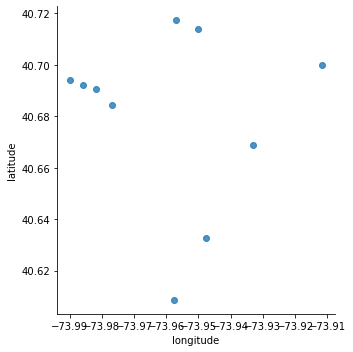

In [16]:
sns.lmplot(x = 'longitude', y = 'latitude', fit_reg = False, data = bk_stations)
plt.show()

In [17]:
q_stations = pd.DataFrame()
q_stations = df[df["borough"] == "Q"].groupby(["station_complex","station_complex_id","latitude","longitude"]).agg({"ridership":"mean"}).sort_values("ridership",ascending=False).head(10)
q_stations.reset_index(inplace=True)
q_stations

,station_complex,station_complex_id,latitude,longitude,ridership
0,Flushing-Main St (7),R533,40.76,-73.83,741.58
1,"74-Broadway (7)/Jackson Hts-Roosevelt Av (E,F,...",R525,40.75,-73.89,740.99
2,Junction Blvd (7),R528,40.75,-73.87,343.94
3,"Jamaica Center-Parsons-Archer (E,J,Z)",N606,40.70,-73.80,325.23
4,103 St-Corona Plaza (7),R529,40.75,-73.86,311.80
5,"Forest Hills-71 Av (E,F,M,R)",N333A,40.72,-73.84,305.33
6,"Sutphin Blvd-Archer Av-JFK Airport (E,J,Z)",N605,40.70,-73.81,304.37
7,"Court Sq (E,G,M,7)",N307,40.75,-73.94,280.20
8,"Kew Gardens-Union Turnpike (E,F)",N336,40.71,-73.83,276.09
9,Woodside-61 St (7),R523,40.75,-73.90,237.46


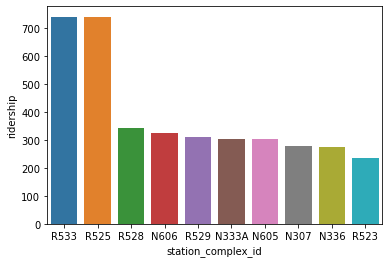

In [18]:
sns.barplot(x = "station_complex_id", y = "ridership", data = q_stations)
plt.show()

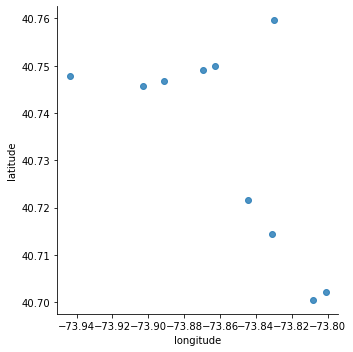

In [19]:
sns.lmplot(x = 'longitude', y = 'latitude', fit_reg = False, data = q_stations)
plt.show()

In [20]:
sample = df[df["station_complex_id"]=="H009"].sort_values("ridership",ascending=False)

In [21]:
sample.head(20)

,transit_timestamp,station_complex_id,station_complex,borough,routes,ridership,latitude,longitude
5085031,11/06/2022 12:00:00 PM,H009,Bedford Av (L),BK,L,2998,40.72,-73.96
5087443,11/06/2022 01:00:00 PM,H009,Bedford Av (L),BK,L,2989,40.72,-73.96
5083212,09/12/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2951,40.72,-73.96
5081115,09/19/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2932,40.72,-73.96
5073623,06/10/2023 05:00:00 PM,H009,Bedford Av (L),BK,L,2896,40.72,-73.96
5070161,09/20/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2874,40.72,-73.96
5073316,04/22/2023 05:00:00 PM,H009,Bedford Av (L),BK,L,2717,40.72,-73.96
5081843,09/06/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2682,40.72,-73.96
5071560,09/13/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2677,40.72,-73.96
5073953,06/13/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2666,40.72,-73.96


In [22]:
time_table = pd.DataFrame()
time_table["time"] = pd.to_datetime(sample["transit_timestamp"])

In [23]:
time_table["Date"] = time_table["time"].dt.date
time_table["Hour"] = time_table["time"].dt.time

In [24]:
time_table.drop(columns="time",inplace=True)

In [25]:
time_table.head(25)

,Date,Hour
5085031,2022-11-06,12:00:00
5087443,2022-11-06,13:00:00
5083212,2023-09-12,08:00:00
5081115,2023-09-19,08:00:00
5073623,2023-06-10,17:00:00
5070161,2023-09-20,08:00:00
5073316,2023-04-22,17:00:00
5081843,2023-09-06,08:00:00
5071560,2023-09-13,08:00:00
5073953,2023-06-13,08:00:00


In [26]:
sample_station_time = pd.DataFrame(pd.merge(time_table,sample,on=sample.index))
sample_station_time.sort_values(by="ridership",ascending=False)

,key_0,Date,Hour,transit_timestamp,station_complex_id,station_complex,borough,routes,ridership,latitude,longitude
0,5085031,2022-11-06,12:00:00,11/06/2022 12:00:00 PM,H009,Bedford Av (L),BK,L,2998,40.72,-73.96
1,5087443,2022-11-06,13:00:00,11/06/2022 01:00:00 PM,H009,Bedford Av (L),BK,L,2989,40.72,-73.96
2,5083212,2023-09-12,08:00:00,09/12/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2951,40.72,-73.96
3,5081115,2023-09-19,08:00:00,09/19/2023 08:00:00 AM,H009,Bedford Av (L),BK,L,2932,40.72,-73.96
4,5073623,2023-06-10,17:00:00,06/10/2023 05:00:00 PM,H009,Bedford Av (L),BK,L,2896,40.72,-73.96
...,...,...,...,...,...,...,...,...,...,...,...
28080,5081977,2023-03-04,15:00:00,03/04/2023 03:00:00 PM,H009,Bedford Av (L),BK,L,1,40.72,-73.96
28079,5081165,2023-01-29,23:00:00,01/29/2023 11:00:00 PM,H009,Bedford Av (L),BK,L,1,40.72,-73.96
28078,5091844,2023-03-04,09:00:00,03/04/2023 09:00:00 AM,H009,Bedford Av (L),BK,L,1,40.72,-73.96
28077,5091181,2023-03-05,22:00:00,03/05/2023 10:00:00 PM,H009,Bedford Av (L),BK,L,1,40.72,-73.96


In [27]:
hour_based = pd.DataFrame(sample_station_time.groupby("Hour").agg({"ridership":"mean"}).tail(18))
hour_based.reset_index(inplace=True)
hour_based

,Hour,ridership
0,06:00:00,134.55
1,07:00:00,418.55
2,08:00:00,881.77
3,09:00:00,672.06
4,10:00:00,449.14
5,11:00:00,448.50
6,12:00:00,485.44
7,13:00:00,540.43
8,14:00:00,608.08
9,15:00:00,697.07


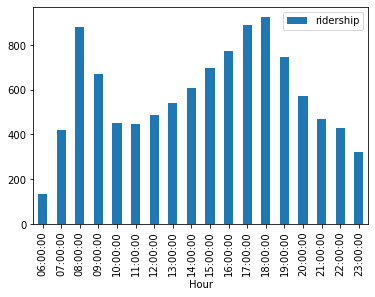

In [28]:
hour_based.plot.bar(x="Hour")
plt.show()

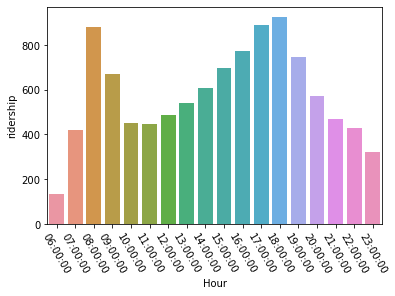

In [29]:
sns.barplot(x = "Hour", y = "ridership", data = hour_based)
plt.xticks(rotation=-60)
plt.show()

In [40]:
station_adress = pd.DataFrame(df[["latitude","longitude","station_complex_id","ridership"]].drop_duplicates(subset=["latitude","longitude"]))
station_adress.sort_values(by="longitude")

,latitude,longitude,station_complex_id,ridership
10919885,40.64,-74.07,S102,1
10681035,40.64,-74.07,S101,5
4801877,40.62,-74.03,C027,7
3940880,40.62,-74.03,C025,5
1007,40.63,-74.03,C024,1
...,...,...,...,...
8230110,40.71,-73.78,N343,2
4924045,40.59,-73.78,N193,1
4899129,40.60,-73.77,N194,6
4874391,40.60,-73.76,N195,18


In [41]:
station_adress[station_adress["station_complex_id"]=="R533"]

,latitude,longitude,station_complex_id,ridership
7138493,40.76,-73.83,R533,3177


In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

/Users/umut/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


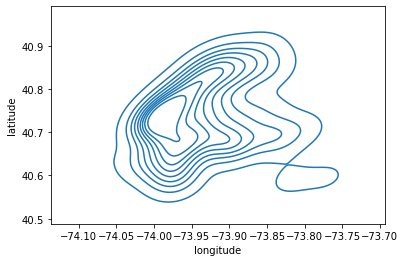

In [42]:
sns.kdeplot(station_adress.longitude,station_adress.latitude)
plt.show()

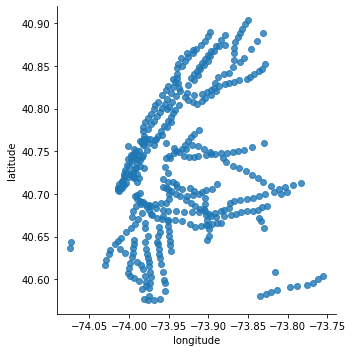

In [49]:
station_map = sns.lmplot(x = 'longitude', y = 'latitude', fit_reg = False, data = station_adress)

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

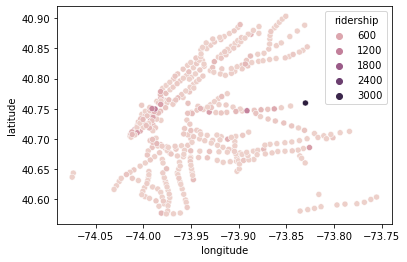

In [48]:
sns.scatterplot(data=station_adress, x="longitude",y="latitude",hue="ridership")